https://github.com/AminHP/gym-anytrading

In [20]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines3.a2c import A2C
from stable_baselines3.dqn import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

In [ ]:
def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyForexEnv(ForexEnv):
    _process_data = my_process_data


env = MyForexEnv(df=FOREX_EURUSD_1H_ASK, window_size=12, frame_bound=(12, len(FOREX_EURUSD_1H_ASK)))

In [ ]:
def my_process_data(df, window_size, frame_bound):
    start = frame_bound[0] - window_size
    end = frame_bound[1]
    prices = df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyStocksEnv(StocksEnv):
    
    def __init__(self, prices, signal_features, **kwargs):
        self._prices = prices
        self._signal_features = signal_features
        super().__init__(**kwargs)

    def _process_data(self):
        return self._prices, self._signal_features

    
prices, signal_features = my_process_data(df=STOCKS_GOOGL, window_size=30, frame_bound=(30, len(STOCKS_GOOGL)))
env = MyStocksEnv(prices, signal_features, df=STOCKS_GOOGL, window_size=30, frame_bound=(30, len(STOCKS_GOOGL)))

In [3]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [37]:
env.

Box([[-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]], [[inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]], (10, 2), float64)

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
...,...,...,...,...,...,...
2018-08-23,1219.880005,1235.170044,1219.349976,1221.160034,1221.160034,1233300
2018-08-24,1226.000000,1237.400024,1221.420044,1236.750000,1236.750000,1222700
2018-08-27,1244.140015,1257.869995,1240.680054,1256.270020,1256.270020,1429000


In [21]:


model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)
     

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.32e+03 |
|    ep_rew_mean      | 640      |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 14799    |
|    time_elapsed     | 0        |
|    total_timesteps  | 9296     |
----------------------------------


In [34]:

env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    #print(_states)
    observation, reward, done, info = env.step(action)
    print(observation)
    # env.render()
    if done:
        print("info:", info)
        break
     

[[202.982986   0.600601]
 [205.405411   2.422425]
 [208.823822   3.418411]
 [213.4935     4.669678]
 [214.414413   0.920913]
 [216.041046   1.626633]
 [220.360367   4.319321]
 [222.382385   2.022018]
 [219.604599  -2.777786]
 [218.02803   -1.576569]]
[[205.405411   2.422425]
 [208.823822   3.418411]
 [213.4935     4.669678]
 [214.414413   0.920913]
 [216.041046   1.626633]
 [220.360367   4.319321]
 [222.382385   2.022018]
 [219.604599  -2.777786]
 [218.02803   -1.576569]
 [216.51651   -1.51152 ]]
[[208.823822   3.418411]
 [213.4935     4.669678]
 [214.414413   0.920913]
 [216.041046   1.626633]
 [220.360367   4.319321]
 [222.382385   2.022018]
 [219.604599  -2.777786]
 [218.02803   -1.576569]
 [216.51651   -1.51152 ]
 [214.714722  -1.801788]]
[[213.4935     4.669678]
 [214.414413   0.920913]
 [216.041046   1.626633]
 [220.360367   4.319321]
 [222.382385   2.022018]
 [219.604599  -2.777786]
 [218.02803   -1.576569]
 [216.51651   -1.51152 ]
 [214.714722  -1.801788]
 [212.632629  -2.08209

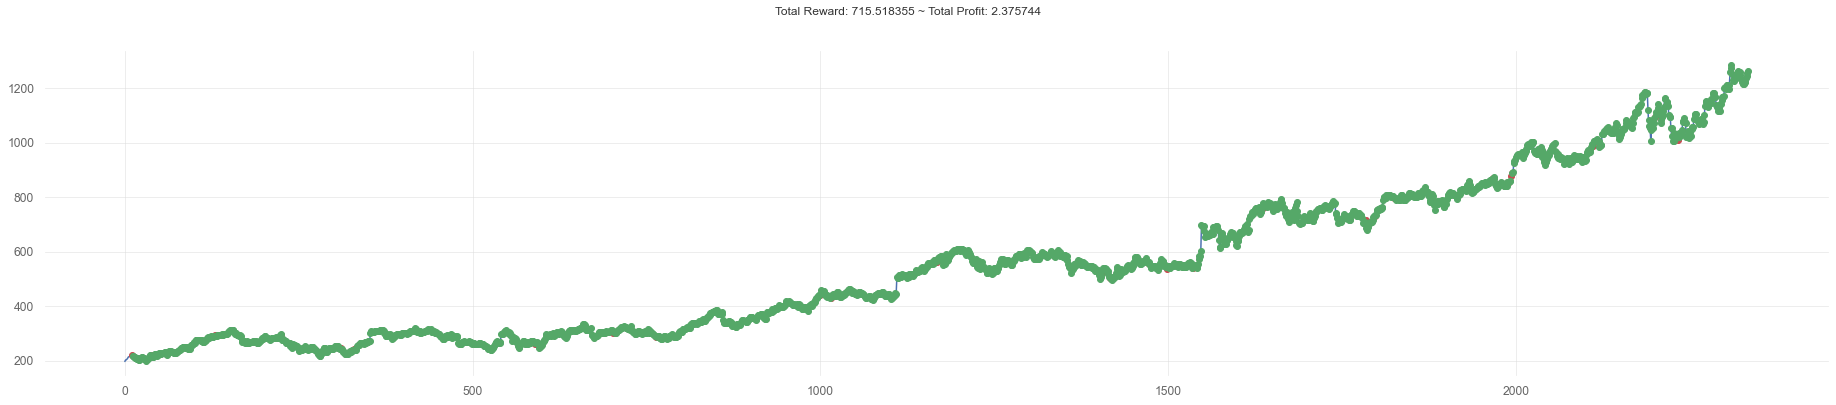

In [31]:
plt.figure(figsize=(32, 6))
env.render_all()
plt.show()

In [32]:
print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())


env information:
> shape: (10, 2)
> df.shape: (2335, 6)
> prices.shape: (2335,)
> signal_features.shape: (2335, 2)
> max_possible_profit: 346146.19611913303


info: {'total_reward': 15.865845000000036, 'total_profit': 0.9942490332328198, 'position': 0}


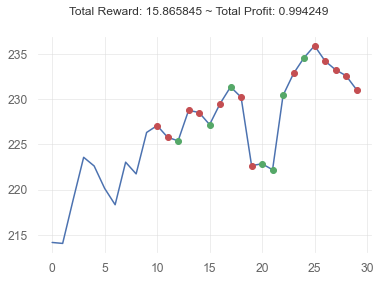

In [38]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

#env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
env = gym.make('stocks-v0', frame_bound=(50, 70), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             3.0%

Cumulative Return          137.57%
CAGR﹪                     9.83%

Sharpe                     0.5
Prob. Sharpe Ratio         96.11%
Smart Sharpe               0.5
Sortino                    1.09
Smart Sortino              1.09
Sortino/√2                 0.77
Smart Sortino/√2           0.77
Omega                      1.8

Max Drawdown               -23.48%
Longest DD Days            1065
Volatility (ann.)          24.22%
Calmar                     0.42
Skew                       9.82
Kurtosis                   185.0

Expected Daily %           0.04%
Expected Monthly %         0.78%
Expected Yearly %          9.04%
Kelly Criterion            21.77%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.46%
Expected Shortfall (cVaR)  -2.46%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2010-02-08,2010-09-13,2013-01-08,1065,-23.484935,-22.343001
2,2014-01-13,2015-01-07,2015-11-09,665,-21.436625,-21.141500
3,2015-11-19,2016-06-23,2017-03-16,483,-14.270674,-10.731932
4,2018-04-02,2018-04-06,2018-08-29,149,-11.728257,-9.613967
5,2009-07-08,2009-07-08,2009-11-25,140,-8.986557,-3.310695


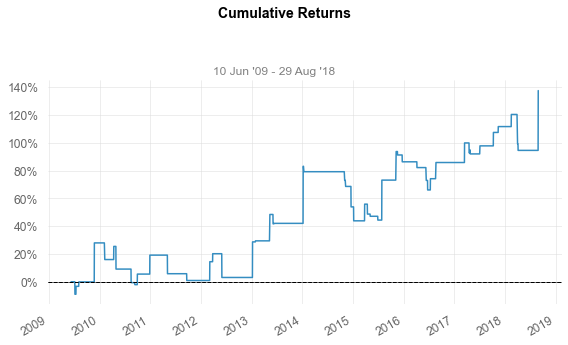

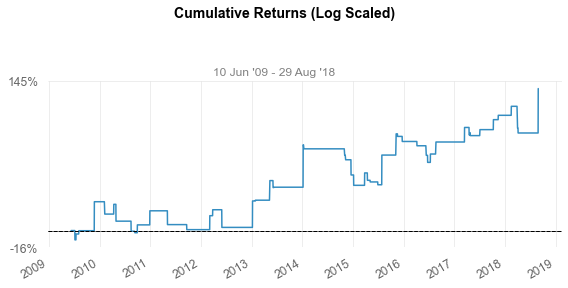

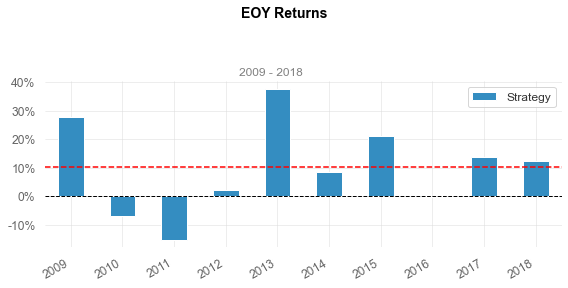

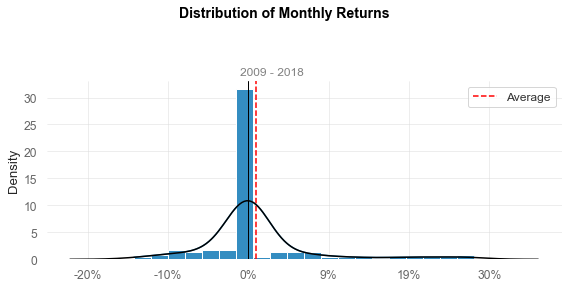

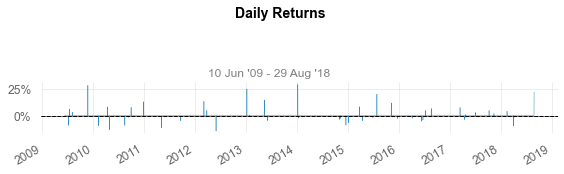

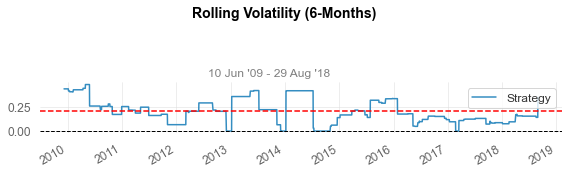

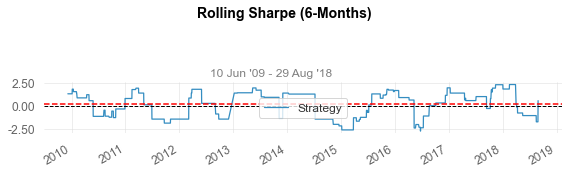

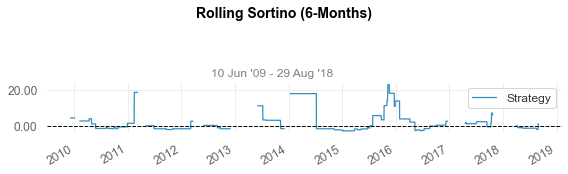

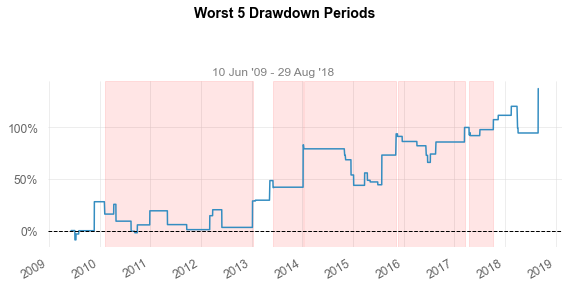

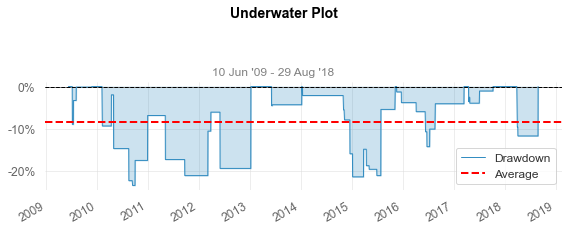

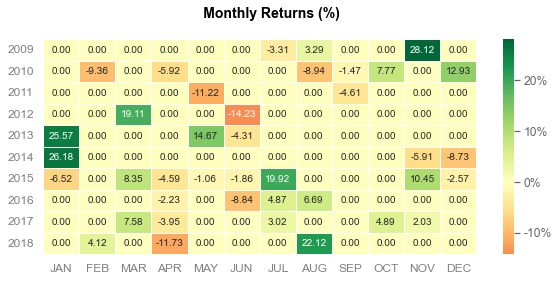

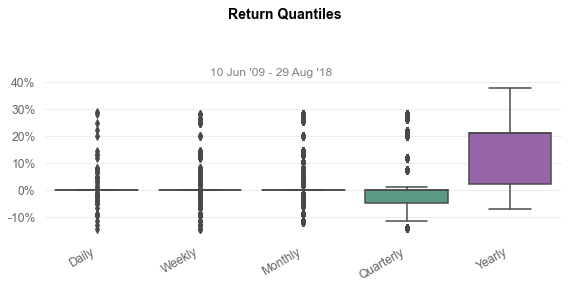

In [33]:

qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='dqn_quantstats.html')